# Trablho de Conclusão de Curso - UNIVESP - 1S/2025- Notebook 2

# Código: tcc530-sala-002grupo-002

## 1.0 Packges

### Packges Import

In [1]:
# Packages

# Bibliotecas Gerais
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt
import seaborn                 as sns
import sys
import time
from scipy                     import stats

#Bibliotecas de Regressão
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.svm             import SVR
from sklearn.tree            import DecisionTreeRegressor
from sklearn.linear_model    import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV, HuberRegressor, LassoLars, BayesianRidge
from sklearn.linear_model    import SGDRegressor
from sklearn.ensemble        import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# Bibliotecas de Clusterização
import scipy.cluster.hierarchy as shc
from sklearn.cluster           import KMeans
from sklearn.metrics           import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.mixture           import GaussianMixture
from sklearn.neural_network    import MLPRegressor
from sklearn.metrics           import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection   import GridSearchCV
from sklearn.model_selection   import RandomizedSearchCV
from sklearn.neighbors         import NearestNeighbors
from sklearn.cluster           import DBSCAN
from sklearn.cluster           import AgglomerativeClustering

# Bibliotecas Classificação
from sklearn                       import metrics
from sklearn.preprocessing         import MinMaxScaler
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier
from sklearn.naive_bayes           import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.svm                   import SVC
from sklearn.neural_network        import MLPClassifier
from sklearn.metrics               import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics               import classification_report
from sklearn.metrics               import ConfusionMatrixDisplay
from sklearn.metrics               import RocCurveDisplay

# Bibliotecas de Recomendação
from sklearn.metrics.pairwise      import cosine_similarity

# Redução de Dimensionalidade
from sklearn.decomposition         import PCA
from sklearn.decomposition         import TruncatedSVD

### Packges Version Control

In [2]:
pip freeze --local > ../requeriments.txt

Note: you may need to restart the kernel to use updated packages.


## 2.0 Data Read

In [3]:
link   = '../dados/dados_join.csv'
df = pd.read_csv(link,sep=",",low_memory=False)

In [4]:
link                  = '../dados/colnames.csv'
colnames_dengue_bahia = pd.read_csv(link,sep=",")

In [5]:
colnamesbahia = colnames_dengue_bahia['nomes'].values.tolist()

In [6]:
print('Colunas que não temos em nosso dataset!')
for column in colnamesbahia:
    if(column not in df.columns): 
        print(column)

Colunas que não temos em nosso dataset!
NU_NOTIFIC
ID_PESSOA
NOME
NOME DO MUNICÍPIO
POPULAÇÃO ESTIMADA 2020
POPULAÇÃO ESTIMADA 2019
POPULAÇÃO ESTIMADA 2018
POPULAÇÃO ESTIMADA 2017
POPULAÇÃO ESTIMADA 2016
POPULAÇÃO ESTIMADA 2015
POPULAÇÃO ESTIMADA 2014
POPULAÇÃO ESTIMADA 2013
POPULAÇÃO ESTIMADA 2012
POPULAÇÃO ESTIMADA 2011
MUN_HOSP
UF_HOSP
MUN_SAUDENOT
UF_SAUDENOT
MUNI_RESI
UF_RESI
MUN_INFEC
UF_INFEC
IDADE
SEM_PRI_V


In [7]:
df_new = pd.DataFrame()

In [8]:
for column in colnamesbahia:

    if(column in df.columns): 
        
        df_new[column] = df[column].copy()

/tmp/ipykernel_57952/301521693.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[column] = df[column].copy()
/tmp/ipykernel_57952/301521693.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[column] = df[column].copy()
/tmp/ipykernel_57952/301521693.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

## 3.0 Data Select

### Análise Baseada no Trabalho Desenvolvido em: https://github.com/SarahSouzaPontes/analise_dados_dengue

##### 3.1 Sexo

In [9]:
df['CS_SEXO'].replace({'M': 'Masculino', 'F': 'Feminino', 'I': 'Sem Registro'}, inplace=True)

/tmp/ipykernel_57952/970007130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CS_SEXO'].replace({'M': 'Masculino', 'F': 'Feminino', 'I': 'Sem Registro'}, inplace=True)


In [10]:
print(df['CS_SEXO'].unique())

['Feminino' 'Masculino' 'Sem Registro']


##### 3.2 Raça

In [11]:
df['CS_RACA'].replace({
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    6: 'Ignorado',
    9: 'Sem Registro'
}, inplace=True)

/tmp/ipykernel_57952/541287559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CS_RACA'].replace({


In [12]:
print(f"Categorias únicas na coluna CS_RACA: {df['CS_RACA'].unique()}")

Categorias únicas na coluna CS_RACA: ['Sem Registro' 'Branca' 'Preta' 'Parda' 'Amarela' 'Indígena']


##### 3.3 Sintomas 1

In [13]:
colunas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
           'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO',
           'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
           'ACIDO_PEPT', 'AUTO_IMUNE']

In [14]:
for coluna in colunas:
    df[coluna].fillna(0, inplace=True)
    df[coluna].replace({1: 'Sim', 2: 'Não'}, inplace=True)
    df[coluna].replace({0: 'Sem Registro'}, inplace=True)

/tmp/ipykernel_57952/3739927340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(0, inplace=True)
/tmp/ipykernel_57952/3739927340.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [15]:
for coluna in colunas:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

Categorias únicas na coluna FEBRE: ['Sim' 'Não' 'Sem Registro']
Categorias únicas na coluna MIALGIA: ['Sim' 'Não' 'Sem Registro']
Categorias únicas na coluna CEFALEIA: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna EXANTEMA: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna VOMITO: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna NAUSEA: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna DOR_COSTAS: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna CONJUNTVIT: ['Não' 'Sem Registro' 'Sim']
Categorias únicas na coluna ARTRITE: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna ARTRALGIA: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna PETEQUIA_N: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna LEUCOPENIA: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna LACO: ['Não' 'Sem Registro' 'Sim']
Categorias únicas na coluna DOR_RETRO: ['Não' 'Sim' 'Sem Registro']
Categorias únicas na coluna DIABETES: ['Não' 'Sim' 'Sem Registro'

##### 3.4 Exames e Resultados Clínicos

In [16]:
mapeamento = {
    'RES_CHIKS1': {4: 'Chikungunya', 2: 'Negativo', 1: 'Positivo', pd.NA: 'Sem Registro'},
    'RES_CHIKS2': {4: 'Chikungunya', 2: 'Negativo', pd.NA: 'Sem Registro'},
    'RESUL_PRNT': {4: 'Sem Registro', 2: 'Negativo'},
    'RESUL_SORO': {4: 'Sem Registro', 1: 'Positivo', 3: 'Inconclusivo', 2: 'Negativo'},
    'RESUL_NS1': {pd.NA: 'Sem Registro', 4: 'Não realizado', 2: 'Negativo', 1: 'Positivo', 3: 'Inconclusivo'},
    'RESUL_VI_N': {pd.NA: 'Sem Registro', 4: 'Não realizado', 2: 'Negativo', 1: 'Positivo', 3: 'Inconclusivo'},
    'SOROTIPO': {pd.NA: 'Sem Registro', 4: 'DEN 4', 3: 'DEN 3', 2: 'DEN 2', 1: 'DEN 1'},
    'HISTOPA_N': {pd.NA: 'Sem Registro', 4: 'Não realizado', 2: 'Negativo', 1: 'Positivo', 3: 'Inconclusivo'},
    'IMUNOH_N': {pd.NA: 'Sem Registro', 4: 'Sem Registro', 3: 'Sem Registro', 2: 'Negativo', 1: 'Positivo'},
    'HOSPITALIZ': {1: 'Hospitalizado', 2: 'Não hospitalizado', 9: 'Ignorado'},
    'TPAUTOCTO': {2: 'Autóctone', pd.NA: 'Sem Registro', 1: 'Sem Registro', 3: 'Sem Registro'},
    'COUFINF': {29: '29', pd.NA: 'Sem Registro', 31: '31', 35: '35', 53: '53', 17: '17', 52: '52', 26: '26'},
    'COPAINF': {1: '1', pd.NA: 'Sem Registro'},
    'CLASSIFIN': {8: 'Descartado', 1: '1', 5: '5', pd.NA: 'Sem Registro', 2: '2', 3: '3', 10: '10', 11: '11', 12: '12', 13: '13'},
    'CRITERIO': {pd.NA: 'Sem Registro', 3: 'Em investigação', 2: 'Clínico', 1: 'Laboratório'},
    'DOENCA_TRA': {2: 'Sim', pd.NA: 'Sem Registro', 9: 'Ignorado', 1: 'Não'},
    'CLINC_CHIK': {pd.NA: 'Sem Registro', 1: 'Aguda', 2: 'Crônica'},
    'EVOLUCAO': {pd.NA: 'Sem Registro', 1: 'cura', 9: 'ignorado', 3: 'óbito por outras causas', 4: 'óbito em investigação', 2: 'óbito pelo agravo'}
}

In [17]:
df.replace(mapeamento, inplace=True)

In [18]:
colunas = ['RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','RESUL_SORO','RESUL_NS1','RESUL_VI_N','SOROTIPO','HISTOPA_N','IMUNOH_N',
           'HOSPITALIZ','TPAUTOCTO','COUFINF','CRITERIO','DOENCA_TRA','CLINC_CHIK','EVOLUCAO']

In [19]:
for coluna in colunas:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

Categorias únicas na coluna RES_CHIKS1: [nan 'Chikungunya' 'Negativo' 3.0 'Positivo']
Categorias únicas na coluna RES_CHIKS2: [nan 'Chikungunya' 'Negativo' 3.0 1.0]
Categorias únicas na coluna RESUL_PRNT: [nan 'Sem Registro' 'Negativo']
Categorias únicas na coluna RESUL_SORO: [nan 'Sem Registro' 'Negativo' 'Positivo' 'Inconclusivo']
Categorias únicas na coluna RESUL_NS1: ['Positivo' 'Não realizado' 'Negativo' nan 'Inconclusivo']
Categorias únicas na coluna RESUL_VI_N: [nan 'Não realizado' 'Positivo' 'Negativo' 'Inconclusivo']
Categorias únicas na coluna SOROTIPO: [nan 'DEN 1' 'DEN 2' 'DEN 3']
Categorias únicas na coluna HISTOPA_N: [nan 'Não realizado' 'Negativo' 'Inconclusivo' 'Positivo']
Categorias únicas na coluna IMUNOH_N: [nan 'Sem Registro' 'Negativo' 'Positivo']
Categorias únicas na coluna HOSPITALIZ: ['Não hospitalizado' nan 'Hospitalizado' 'Ignorado']
Categorias únicas na coluna TPAUTOCTO: [nan 'Sem Registro' 'Autóctone']
Categorias únicas na coluna COUFINF: [nan 27.0 '29' '35'

##### 3.5 Alarmes

In [20]:
colunas_alrm = [coluna for coluna in df.columns if coluna.startswith('ALRM')]

In [21]:
mapeamento_alrm = {
    np.nan: 'Sem Registro',
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

In [22]:
for coluna in colunas_alrm:
    df[coluna] = df[coluna].replace(mapeamento_alrm)

In [23]:
for coluna in colunas_alrm:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

Categorias únicas na coluna ALRM_HIPOT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_PLAQ: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna ALRM_VOM: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_SANG: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_HEMAT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_ABDOM: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_LETAR: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_HEPAT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna ALRM_LIQ: ['Sem Registro' 'Não' 'Sim']


##### 3.6 Gravidade

In [24]:
colunas_grav = [coluna for coluna in df.columns if coluna.startswith('GRAV')]

In [25]:
mapeamento_grav = {
    np.nan: 'Sem Registro',
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

In [26]:
for coluna in colunas_grav:
    df[coluna] = df[coluna].replace(mapeamento_grav)

In [27]:
for coluna in colunas_grav:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

Categorias únicas na coluna GRAV_PULSO: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_CONV: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_ENCH: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_INSUF: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_TAQUI: ['Sem Registro' 'Sim' 'Não']
Categorias únicas na coluna GRAV_EXTRE: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_HIPOT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_HEMAT: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_MELEN: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_METRO: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_SANG: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_AST: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_MIOC: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_CONSC: ['Sem Registro' 'Não' 'Sim']
Categorias únicas na coluna GRAV_ORGAO: 

for coluna in colunas_grav:
    print(f"Categorias únicas na coluna {coluna}: {df[coluna].unique()}")

##### 3.6 Sintomas 2

In [28]:
mapeamento_mani_hemor = {
    np.nan: 'Sem Registro',
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9: 'Não Realizado'
}

mapeamento_epistaxe = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_gengivo = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_metro = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_petequias = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_hematuria = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_sangram = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_laco_n = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9: 'Não Realizado'
}

mapeamento_plasmatico = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    9: 'Não Realizado'
}

mapeamento_evidencia = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    3: 'Indeterminado'
}

mapeamento_con_fhd = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_complica = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    3: 'Indeterminado'
}

mapeamento_tp_sistema = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_nduplic_n = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

mapeamento_cs_flxret = {
    0: 'Sem Registro',
    1: 'Sim',
    2: 'Não',
    5: 'Sem Registro'
}

mapeamento_flxrecebi = {
    np.nan: 'Sem Registro',
    1: 'Sim',
    2: 'Não'
}

In [29]:
df['MANI_HEMOR'] = df['MANI_HEMOR'].replace(mapeamento_mani_hemor)
df['EPISTAXE'] = df['EPISTAXE'].replace(mapeamento_epistaxe)
df['GENGIVO'] = df['GENGIVO'].replace(mapeamento_gengivo)
df['METRO'] = df['METRO'].replace(mapeamento_metro)
df['PETEQUIAS'] = df['PETEQUIAS'].replace(mapeamento_petequias)
df['HEMATURA'] = df['HEMATURA'].replace(mapeamento_hematuria)
df['SANGRAM'] = df['SANGRAM'].replace(mapeamento_sangram)
df['LACO_N'] = df['LACO_N'].replace(mapeamento_laco_n)
df['PLASMATICO'] = df['PLASMATICO'].replace(mapeamento_plasmatico)
df['EVIDENCIA'] = df['EVIDENCIA'].replace(mapeamento_evidencia)
df['CON_FHD'] = df['CON_FHD'].replace(mapeamento_con_fhd)
df['COMPLICA'] = df['COMPLICA'].replace(mapeamento_complica)
df['TP_SISTEMA'] = df['TP_SISTEMA'].replace(mapeamento_tp_sistema)
df['NDUPLIC_N'] = df['NDUPLIC_N'].replace(mapeamento_nduplic_n)
df['CS_FLXRET'] = df['CS_FLXRET'].replace(mapeamento_cs_flxret)
df['FLXRECEBI'] = df['FLXRECEBI'].replace(mapeamento_flxrecebi)

In [30]:
print("Categorias únicas na coluna MANI_HEMOR:", df['MANI_HEMOR'].unique())
print("Categorias únicas na coluna EPISTAXE:", df['EPISTAXE'].unique())
print("Categorias únicas na coluna GENGIVO:", df['GENGIVO'].unique())
print("Categorias únicas na coluna METRO:", df['METRO'].unique())
print("Categorias únicas na coluna HEMATURA:", df['HEMATURA'].unique())
print("Categorias únicas na coluna SANGRAM:", df['SANGRAM'].unique())
print("Categorias únicas na coluna LACO_N:", df['LACO_N'].unique())
print("Categorias únicas na coluna PLASMATICO:", df['PLASMATICO'].unique())
print("Categorias únicas na coluna EVIDENCIA:", df['EVIDENCIA'].unique())
print("Categorias únicas na coluna CON_FHD:", df['CON_FHD'].unique())
print("Categorias únicas na coluna COMPLICA:", df['COMPLICA'].unique())
print("Categorias únicas na coluna TP_SISTEMA:", df['TP_SISTEMA'].unique())
print("Categorias únicas na coluna NDUPLIC_N:", df['NDUPLIC_N'].unique())
print("Categorias únicas na coluna CS_FLXRET:", df['CS_FLXRET'].unique())
print("Categorias únicas na coluna FLXRECEBI:", df['FLXRECEBI'].unique())

Categorias únicas na coluna MANI_HEMOR: ['Sem Registro']
Categorias únicas na coluna EPISTAXE: ['Sem Registro']
Categorias únicas na coluna GENGIVO: ['Sem Registro']
Categorias únicas na coluna METRO: ['Sem Registro']
Categorias únicas na coluna HEMATURA: ['Sem Registro']
Categorias únicas na coluna SANGRAM: ['Sem Registro']
Categorias únicas na coluna LACO_N: ['Sem Registro']
Categorias únicas na coluna PLASMATICO: ['Sem Registro']
Categorias únicas na coluna EVIDENCIA: ['Sem Registro']
Categorias únicas na coluna CON_FHD: ['Sem Registro']
Categorias únicas na coluna COMPLICA: ['Sem Registro']
Categorias únicas na coluna TP_SISTEMA: ['Não' 'Sem Registro']
Categorias únicas na coluna NDUPLIC_N: ['Sem Registro' 'Sim']
Categorias únicas na coluna CS_FLXRET: ['Sim' 'Sem Registro']
Categorias únicas na coluna FLXRECEBI: ['Sem Registro']


##### 3.7 Escolaridade

In [31]:
mapeamento_escolaridade = {
    1: '1ª a 4ª série incompleta do EF',
    2: '4ª série completa do EF (antigo 1° grau)',
    3: '5ª à 8ª série incompleta do EF (antigo ginásio ou 1° grau)',
    4: 'Ensino fundamental completo (antigo ginásio ou 1° grau)',
    5: 'Ensino médio incompleto (antigo colegial ou 2° grau)',
    6: 'Ensino médio completo (antigo colegial ou 2° grau)',
    7: 'Educação superior incompleta',
    8: 'Educação superior completa',
    9: 'Ignorado',
    10: 'Não se aplica'
}

In [32]:
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].replace(mapeamento_escolaridade)

In [33]:
df['CS_ESCOL_N'].unique()

array(['Ignorado', 'Ensino médio completo (antigo colegial ou 2° grau)',
       '5ª à 8ª série incompleta do EF (antigo ginásio ou 1° grau)',
       'Educação superior completa', nan,
       '4ª série completa do EF (antigo 1° grau)',
       'Ensino médio incompleto (antigo colegial ou 2° grau)',
       'Não se aplica', '1ª a 4ª série incompleta do EF',
       'Ensino fundamental completo (antigo ginásio ou 1° grau)',
       'Educação superior incompleta', 0.0], dtype=object)

##### 3.8 Gestantes

In [34]:
mapeamento_gestante = {
    1: '1º Trimestre',
    2: '2º Trimestre',
    3: '3º Trimestre',
    4: 'Idade gestacional ignorada',
    5: 'Não',
    6: 'Não se aplica',
    9: 'Ignorado'
}

In [35]:
df['CS_GESTANT'] = df['CS_GESTANT'].replace(mapeamento_gestante)

In [36]:
df['CS_GESTANT'].unique()

array(['Não', 'Não se aplica', 'Ignorado', '2º Trimestre', '3º Trimestre',
       '1º Trimestre', 'Idade gestacional ignorada', nan], dtype=object)

##### 3.9 Análise de Dados Faltantes

/tmp/ipykernel_57952/3147282238.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if X_df[i] == 0:
/tmp/ipykernel_57952/3147282238.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=X_df.index, x=X_df.values, order=X_df.index, orient='h', palette=palette)


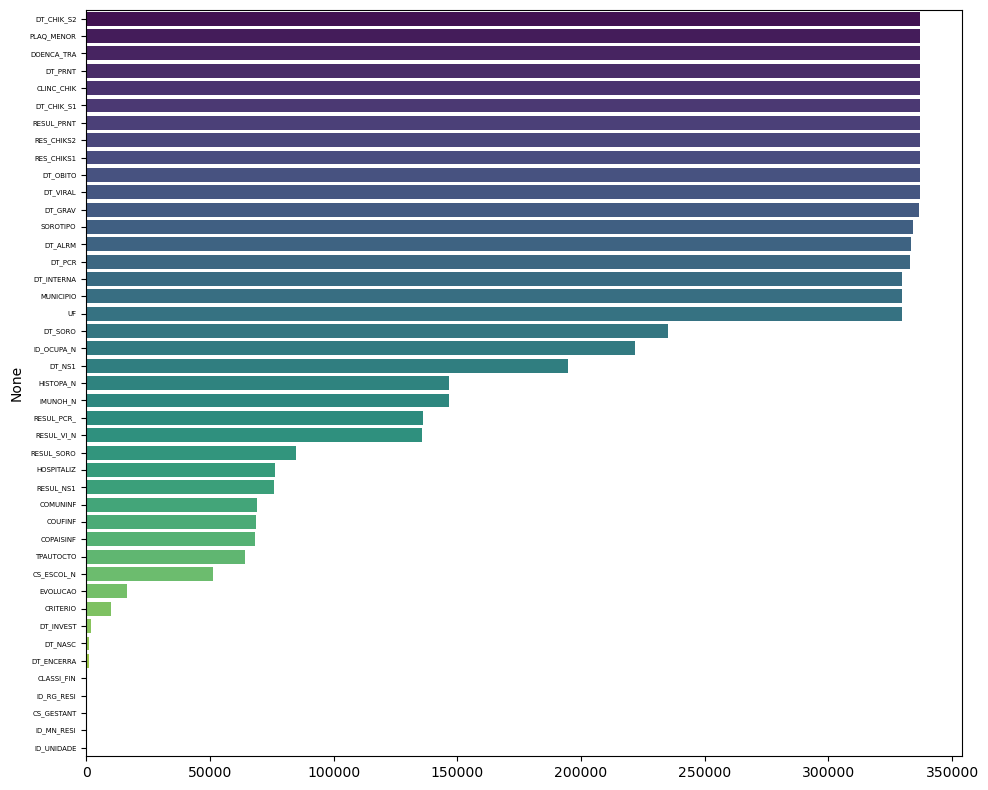

In [37]:
X_df = df.isna().sum().sort_values(ascending=False)
drop_list_df = []
for i in range(len(X_df)):
    if X_df[i] == 0:
        drop_list_df.append(X_df.index[i])

X_df.drop(labels=drop_list_df, inplace=True)

plt.figure(figsize=(10, 8))
palette = sns.color_palette("viridis", len(X_df))
ax = sns.barplot(y=X_df.index, x=X_df.values, order=X_df.index, orient='h', palette=palette)
plt.yticks(fontsize=5, rotation=0)
plt.tight_layout()
plt.show()

In [38]:
rotulos = [label.get_text() for label in ax.get_yticklabels()]
print(rotulos)

['DT_CHIK_S2', 'PLAQ_MENOR', 'DOENCA_TRA', 'DT_PRNT', 'CLINC_CHIK', 'DT_CHIK_S1', 'RESUL_PRNT', 'RES_CHIKS2', 'RES_CHIKS1', 'DT_OBITO', 'DT_VIRAL', 'DT_GRAV', 'SOROTIPO', 'DT_ALRM', 'DT_PCR', 'DT_INTERNA', 'MUNICIPIO', 'UF', 'DT_SORO', 'ID_OCUPA_N', 'DT_NS1', 'HISTOPA_N', 'IMUNOH_N', 'RESUL_PCR_', 'RESUL_VI_N', 'RESUL_SORO', 'HOSPITALIZ', 'RESUL_NS1', 'COMUNINF', 'COUFINF', 'COPAISINF', 'TPAUTOCTO', 'CS_ESCOL_N', 'EVOLUCAO', 'CRITERIO', 'DT_INVEST', 'DT_NASC', 'DT_ENCERRA', 'CLASSI_FIN', 'ID_RG_RESI', 'CS_GESTANT', 'ID_MN_RESI', 'ID_UNIDADE']


In [39]:
for coluna in df.columns:
    valores_unicos = df[coluna].value_counts()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos da coluna 'TP_NOT':
TP_NOT
2    337173
Name: count, dtype: int64

Valores únicos da coluna 'ID_AGRAVO':
ID_AGRAVO
A90    337173
Name: count, dtype: int64

Valores únicos da coluna 'DT_NOTIFIC':
DT_NOTIFIC
2023-04-10    6130
2023-04-24    5603
2023-04-17    5532
2023-04-03    5285
2023-03-27    4969
              ... 
2023-09-17      38
2023-09-24      32
2023-08-13      32
2023-08-27      28
2023-01-01      22
Name: count, Length: 364, dtype: int64

Valores únicos da coluna 'SEM_NOT':
SEM_NOT
202315    26898
202313    24298
202314    22531
202317    21958
202316    21567
202312    21009
202311    17925
202319    17559
202318    17428
202310    15628
202320    15118
202309    12052
202321    10653
202307     9552
202308     8844
202306     7145
202322     6664
202305     5433
202323     4735
202304     4230
202324     4159
202352     3485
202325     3152
202303     2942
202351     2619
202302     2491
202350     2256
202326     1972
202349     1682
202348     1677
202327 

In [40]:
df.fillna('Sem Registro', inplace=True)

/tmp/ipykernel_57952/3056074718.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem Registro' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Sem Registro', inplace=True)


In [41]:
for coluna in df.columns:
    valores_unicos = df[coluna].unique()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos da coluna 'TP_NOT':
[2]

Valores únicos da coluna 'ID_AGRAVO':
['A90']

Valores únicos da coluna 'DT_NOTIFIC':
['2023-03-27' '2023-02-27' '2023-03-02' '2023-03-09' '2023-01-11'
 '2023-01-16' '2023-02-26' '2023-02-28' '2023-03-04' '2023-03-17'
 '2023-03-26' '2023-01-10' '2023-03-20' '2023-03-22' '2023-03-30'
 '2023-03-31' '2023-03-06' '2023-01-22' '2023-01-30' '2023-02-04'
 '2023-03-24' '2023-01-24' '2023-03-29' '2023-01-07' '2023-02-15'
 '2023-02-25' '2023-03-08' '2023-03-13' '2023-02-22' '2023-03-14'
 '2023-03-28' '2023-03-19' '2023-02-21' '2023-02-23' '2023-03-05'
 '2023-01-29' '2023-02-05' '2023-03-03' '2023-03-18' '2023-02-12'
 '2023-02-13' '2023-01-27' '2023-02-09' '2023-03-23' '2023-03-12'
 '2023-01-06' '2023-01-23' '2023-02-02' '2023-03-07' '2023-03-25'
 '2023-01-05' '2023-01-12' '2023-01-13' '2023-01-14' '2023-01-18'
 '2023-01-19' '2023-02-03' '2023-02-11' '2023-02-19' '2023-03-01'
 '2023-03-10' '2023-03-11' '2023-03-16' '2023-01-26' '2023-01-31'
 '2023-02-24' '2

In [42]:
for coluna in df.columns:
    valores_unicos = df[coluna].value_counts()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos da coluna 'TP_NOT':
TP_NOT
2    337173
Name: count, dtype: int64

Valores únicos da coluna 'ID_AGRAVO':
ID_AGRAVO
A90    337173
Name: count, dtype: int64

Valores únicos da coluna 'DT_NOTIFIC':
DT_NOTIFIC
2023-04-10    6130
2023-04-24    5603
2023-04-17    5532
2023-04-03    5285
2023-03-27    4969
              ... 
2023-09-17      38
2023-09-24      32
2023-08-13      32
2023-08-27      28
2023-01-01      22
Name: count, Length: 364, dtype: int64

Valores únicos da coluna 'SEM_NOT':
SEM_NOT
202315    26898
202313    24298
202314    22531
202317    21958
202316    21567
202312    21009
202311    17925
202319    17559
202318    17428
202310    15628
202320    15118
202309    12052
202321    10653
202307     9552
202308     8844
202306     7145
202322     6664
202305     5433
202323     4735
202304     4230
202324     4159
202352     3485
202325     3152
202303     2942
202351     2619
202302     2491
202350     2256
202326     1972
202349     1682
202348     1677
202327 

##### 3.9 New Data Frame

In [44]:
renomeacao_colunas = {
    'SEM_NOT': 'Semana de notificação',
    'NU_ANO': 'Ano da notificação',
    'SG_UF_NOT': 'Sigla do estado da notificação',
    'ID_REGIONA': 'ID da regional',
    'ID_UNIDADE': 'ID da unidade',
    'DT_SIN_PRI': 'Data do sinal/sintoma principal',
    'SEM_PRI': 'Semana do sinal/sintoma principal',
    'DT_NASC': 'Data de nascimento',
    'NU_IDADE_N': 'Número da ID na notificação',
    'CS_SEXO': 'Código do sexo',
    'CS_GESTANT': 'Código de gestante',
    'CS_RACA': 'Código da raça/cor',
    'CS_ESCOL_N': 'Código de escolaridade',
    'SG_UF': 'Sigla do estado',
    'ID_RG_RESI': 'ID da região de residência',
    'ID_PAIS': 'ID do país',
    'DT_INVEST': 'Data do início da investigação',
    'ID_OCUP': 'ID da ocupação',
    'FEBRE': 'Presença de febre',
    'MIALGIA': 'Presença de mialgia',
    'CEFALEIA': 'Presença de cefaleia',
    'EXANTEMA': 'Presença de exantema',
    'VOMITO': 'Presença de vômito',
    'NAUSEA': 'Presença de náusea',
    'DOR_COSTAS': 'Presença de dor nas costas',
    'CONJUNTVIT': 'Presença de conjuntivite',
    'ARTRITE': 'Presença de artrite',
    'ARTRALGIA': 'Presença de artralgia',
    'PETEQUIA_N': 'Presença de petéquias',
    'LEUCOPENIA': 'Presença de leucopenia',
    'LACO': 'Presença de laço',
    'DOR_RETRO': 'Presença de dor retroocular',
    'DIABETES': 'Presença de diabetes',
    'HEMATOLOG': 'Presença de hematológico',
    'HEPATOPAT': 'Presença de hepatopatia',
    'RENAL': 'Presença de renal',
    'HIPERTENSA': 'Presença de hipertensão',
    'ACIDO_PEPT': 'Presença de ácido péptico',
    'AUTO_IMUNE': 'Presença de autoimunidade',
    'DT_CHIK_S1': 'Data de coleta da amostra para o exame CHIKV IgM',
    'DT_CHIK_S2': 'Data de coleta da amostra para o exame CHIKV IgG',
    'DT_PRNT': 'Data de coleta da amostra para o exame PRNT',
    'RES_CHIKS1': 'Resultado do exame CHIKV IgM',
    'RES_CHIKS2': 'Resultado do exame CHIKV IgG',
    'RESUL_PRNT': 'Resultado do exame PRNT',
    'DT_SORO': 'Data da coleta de soro',
    'RESUL_SORO': 'Resultado do exame sorológico',
    'DT_NS1': 'Data da coleta de NS1',
    'RESUL_NS1': 'Resultado do exame NS1',
    'DT_VIRAL': 'Data da coleta do exame de PCR',
    'RESUL_VI_N': 'Resultado do exame de PCR',
    'SOROTIPO': 'Sorotipo',
    'HISTOPA_N': 'Resultado do exame histopatológico',
    'IMUNOH_N': 'Resultado do exame imunohistoquímico',
    'HOSPITALIZ': 'Indicador de hospitalização',
    'DT_INTERNA': 'Data de internação',
    'UF_INFEC': 'Estado do Brasil',
    'TPAUTOCTO': 'Tipo de notificação autóctone',
    'COUFINF': 'Código de confirmação de infecção',
    'COPAISINF': 'Código de país confirmado de infecção',
    'CLASSI_FIN': 'Classificação final do caso',
    'CRITERIO': 'Critério de confirmação',
    'DOENCA_TRA': 'Doença relacionada ao trabalho',
    'CLINC_CHIK': 'Clínica de Chikungunya',
    'EVOLUCAO': 'Evolução do caso',
    'DT_OBITO': 'Data de óbito',
    'DT_ENCERRA': 'Data de encerramento',
    'ALRM_HIPOT': 'Alarme de hipotensão',
    'ALRM_PLAQ': 'Alarme de plaquetas',
    'ALRM_VOM': 'Alarme de vômito',
    'ALRM_SANG': 'Alarme de sangramento',
    'ALRM_HEMAT': 'Alarme de hematoma',
    'GRAV_MIOC': 'Gravidade de miocárdio',
    'GRAV_CONSC': 'Gravidade de nível de consciência',
    'GRAV_ORGAO': 'Gravidade de órgão',
    'DT_GRAV': 'Data da Gravidade',
    'MANI_HEMOR': 'Manifestação de hemorragia',
    'EPISTAXE': 'Manifestação de epistaxe',
    'GENGIVO': 'Manifestação na gengiva',
    'METRO': 'Manifestação de metrorragia',
    'PETEQUIAS': 'Manifestação de petéquias',
    'HEMATURA': 'Manifestação de hematúria',
    'SANGRAM': 'Manifestação de sangramento',
    'PLASMATICO': 'Relacionado ao plasma',
    'EVIDENCIA': 'Evidência médica',
    'PLAQ_MENOR': 'Menor contagem de plaquetas',
    'CON_FHD': 'Hipertensão Familiar',
    'COMPLICA': 'Presença de complicações',
    'TP_SISTEMA': 'Tipo de sistema',
    'NDUPLIC_N': 'Reincidência do quadro',
    'CS_FLXRET': 'Fluxo de retorno',
    'FLXRECEBI': 'Fluxo de retorno recebido',
}

In [45]:
df = df.drop(['LACO_N','DT_PCR','RESUL_PCR_'],axis=1)

In [46]:
df = df.rename(columns=renomeacao_colunas)

In [47]:
print(df.columns)

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'Semana de notificação',
       'Ano da notificação', 'Sigla do estado da notificação', 'ID_MUNICIP',
       'ID da regional', 'ID da unidade', 'Data do sinal/sintoma principal',
       ...
       'Manifestação de sangramento', 'Relacionado ao plasma',
       'Evidência médica', 'Menor contagem de plaquetas',
       'Hipertensão Familiar', 'Presença de complicações', 'Tipo de sistema',
       'Reincidência do quadro', 'Fluxo de retorno',
       'Fluxo de retorno recebido'],
      dtype='object', length=116)


In [48]:
df.shape

(337173, 116)

In [49]:
for coluna in df.columns:
    valores_unicos = df[coluna].value_counts()
    print(f"Valores únicos da coluna '{coluna}':")
    print(valores_unicos)
    print()

Valores únicos da coluna 'TP_NOT':
TP_NOT
2    337173
Name: count, dtype: int64

Valores únicos da coluna 'ID_AGRAVO':
ID_AGRAVO
A90    337173
Name: count, dtype: int64

Valores únicos da coluna 'DT_NOTIFIC':
DT_NOTIFIC
2023-04-10    6130
2023-04-24    5603
2023-04-17    5532
2023-04-03    5285
2023-03-27    4969
              ... 
2023-09-17      38
2023-09-24      32
2023-08-13      32
2023-08-27      28
2023-01-01      22
Name: count, Length: 364, dtype: int64

Valores únicos da coluna 'Semana de notificação':
Semana de notificação
202315    26898
202313    24298
202314    22531
202317    21958
202316    21567
202312    21009
202311    17925
202319    17559
202318    17428
202310    15628
202320    15118
202309    12052
202321    10653
202307     9552
202308     8844
202306     7145
202322     6664
202305     5433
202323     4735
202304     4230
202324     4159
202352     3485
202325     3152
202303     2942
202351     2619
202302     2491
202350     2256
202326     1972
202349     

ValueError: Grouper for 'Data da coleta do exame de PCR' not 1-dimensional

## 4.0 Data Transform

## 5.0 Exploratory Data Analysis

## 6.0 Data Modeling

## 7.0 Data Preparing

## 8.0 ML Models

### 8.1 Traning

### 8.2 Validation

### 8.3 Measuring

### 8.4 Hyperparamerization

## 9.0 ML Models and Data Visualization